In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("C:\\Training\\Phase 1\\Dataset\\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df['ocean_proximity'] = LabelEncoder().fit_transform(df['ocean_proximity'])

In [11]:
df = df.dropna()

In [12]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
base_model = XGBRegressor()
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)
mse_base = mean_squared_error(y_test, y_pred_base)

In [15]:
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [16]:
print("Base MSE:", mse_base)
print("Tuned MSE:", mse_best)
print("Best Parameters:", grid_search.best_params_)

Base MSE: 2346502318.353185
Tuned MSE: 2376875295.518243
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [18]:
features = df[['median_income', 'total_rooms']]
X_scaled = StandardScaler().fit_transform(features)

In [19]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

Text(0.5, 1.0, 'DBSCAN Clusters and Outliers')

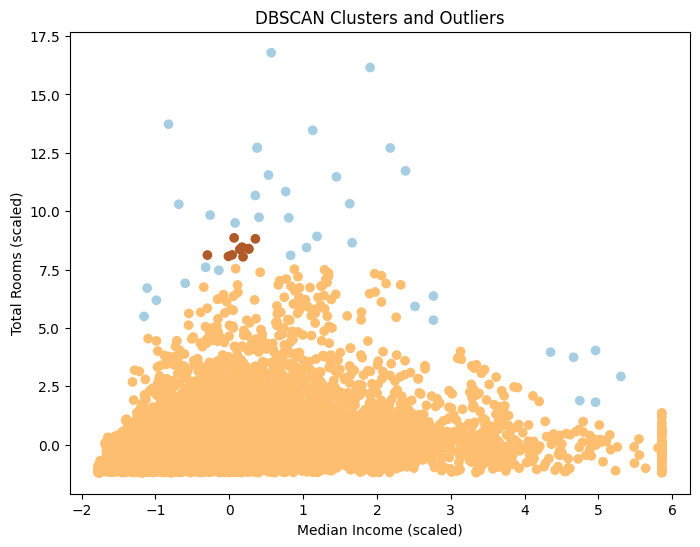

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Paired')
plt.xlabel('Median Income (scaled)')
plt.ylabel('Total Rooms (scaled)')
plt.title('DBSCAN Clusters and Outliers')